## Artificial Intelligence (AI) Assisted Skin Wound Classification and Screening System (Binary Classification)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

In [3]:
print(tf.__version__)

2.19.0


## Data Pre-Processing

### Dataset Preparation

In [5]:
training_data = 'D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_1/training_set'
validation_data = 'D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_1/validation_set'
test_data = 'D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_1/test_set'

### Pre-Processing the Training Set

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,       # Normalizing pixel values to between 0 and 1
                                   shear_range = 0.2,    # Perform Random shear transformation
                                   zoom_range = 0.2,     # Random zoom transformation
                                   horizontal_flip = True) # Random Horizontal flip


In [9]:
# We set up the ImageDataGenerator for training dataset
training_set = train_datagen.flow_from_directory(training_data,  # Path to training data
                                                 target_size = (64,64), # Resize images to 64x64 pixels
                                                 batch_size = 32,       # Number of samples per batch
                                                 class_mode = 'binary') # Binary classification

Found 800 images belonging to 2 classes.


### Pre-Processing the Validation Set

In [11]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_set = validation_datagen.flow_from_directory(validation_data,
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 375 images belonging to 2 classes.


### Pre-Processing the Test Set

In [13]:

test_set = validation_datagen.flow_from_directory(test_data,
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 220 images belonging to 2 classes.


## CNN Model Configuration

In [15]:
# Initialize the CNN
model = Sequential()

# Adding the first Convolutional layer with number of filters = 32
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape=[64,64,3])) # Number of filters applied = 32
# Adding the Pooling layer
model.add(MaxPooling2D(pool_size=2, strides = 2))


# Adding a Second Convolutional layer with number of filters = 64 and the Pooling layer
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu')) # Number of filters applied = 64
model.add(MaxPooling2D(pool_size=2, strides = 2))

# Adding a third Convolutional layer with number of filters = 128 and the Pooling layer
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))  # Number of filters applied = 128
model.add(MaxPooling2D(pool_size=2, strides = 2))


# Flattening Layer - Flattening of 2D Pooled features into a 1D Vector
model.add(Flatten())
# Full Connected Layer to avoid Overfitting
model.add(Dense(128, activation = 'relu')) # Hidden layer
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting


# Output Layer
model.add(Dense(units = 1, activation = 'sigmoid')) # output layer with a single neuron and sigmoid activation function (for Binary Classification)



C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## CNN Training

### CNN Model Compilation

In [17]:
# Compile the CNN model
model.compile(optimizer=Adam(learning_rate=0.001), # Adam Optimizer with small learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Training CNN Model - Training the CNN Model on Training set and Evaluating it on Validation Set

In [19]:
# Train the model
history = model.fit(x=training_set,
                    steps_per_epoch = training_set.samples // training_set.batch_size, # Total number of batches of data to process per epoch
                    validation_data = validation_set, # The validation data for evaluating model performance after each epoch
                    validation_steps = validation_set.samples // validation_set.batch_size,
                    epochs = 25
                    )


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.5469 - loss: 0.7075 - val_accuracy: 0.6534 - val_loss: 0.6635
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.6390 - loss: 0.6541 - val_accuracy: 0.6648 - val_loss: 0.5706
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 100s 4s/step - accuracy: 0.6297 - loss: 0.6477 - val_accuracy: 0.6591 - val_loss: 0.5715
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.6487 - loss: 0.6323 - val_accuracy: 0.6506 - val_loss: 0.5796
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6419 - loss: 0.6199 - val_accuracy: 0.6648 - val_loss: 0.5543
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6464 - loss: 0.5913 - val_accuracy: 0.6619 - val_loss: 0.5864
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6538 - loss: 0.5975 - val_accuracy: 0.7699 - val_loss: 0.5353
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6459 - loss: 0.5568 - val_accuracy: 0.7727 - val_loss

### Visualizing Training Result

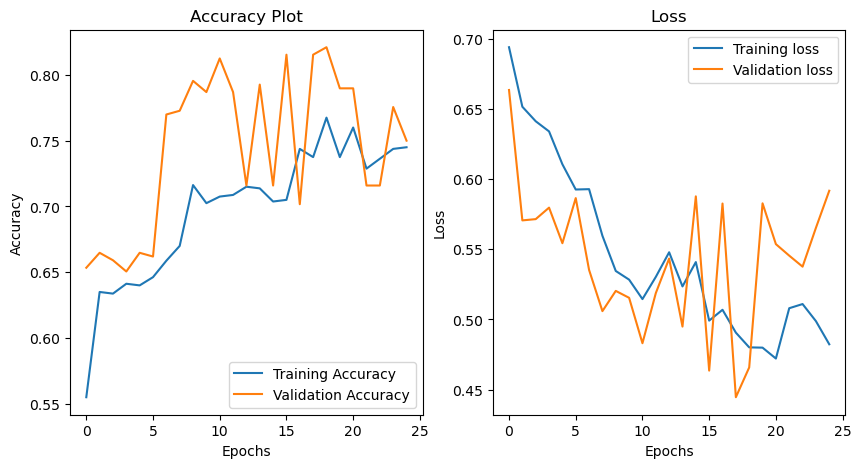

In [21]:
# Plotting training and validation accuracy and loss
plt.figure(figsize=(10,5))
# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Making Predictions

In [23]:
test_image = image.load_img('D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_1/Prediction_set/Actinic_or_Seborrheic_1.jpg.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Actinic Keratosis'
else:
  prediction = 'Sebhorreic Keratosis'

print(prediction)


FileNotFoundError: [Errno 2] No such file or directory: 'D:/University_California_SanDiego/Coursework Files/Introduction to Artificial Intelligence AAI 501/Final Project/dataset_1/Prediction_set/Actinic_or_Seborrheic_1.jpg.jpg'